**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import necessary libraries**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Load the SMS dataset from Google Drive**

In [4]:
file_path = '/content/drive/MyDrive/spam.csv'
sms_data = pd.read_csv(file_path, encoding='latin1')

**Preprocess the dataset**

In [5]:
sms_data['v1'] = sms_data['v1'].map({'ham': 0, 'spam': 1})

 **Split the dataset into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(sms_data['v2'], sms_data['v1'], test_size=0.2, random_state=42)

**Create TF-IDF vectorizer**

In [7]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

**Transform the training data**

In [8]:
X_train_vectorized = vectorizer.fit_transform(X_train)

**Train Logistic Regression model**

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, y_train)

LogisticRegression()

**Make predictions on the test set**

In [10]:
X_test_vectorized = vectorizer.transform(X_test)
predictions = classifier.predict(X_test_vectorized)

**Evaluate the model**

In [11]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



**Allow user to input a message and predict whether it's spam or legitimate**

In [17]:
user_input = input("Enter a message: ")
user_input_vectorized = vectorizer.transform([user_input])
prediction = classifier.predict(user_input_vectorized)

if prediction[0] == 0:
    print("Prediction: Legitimate")
else:
    print("Prediction: Spam")

Enter a message: URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only
Prediction: Spam


**Countplot to visualize the distribution of spam and legitimate messages**

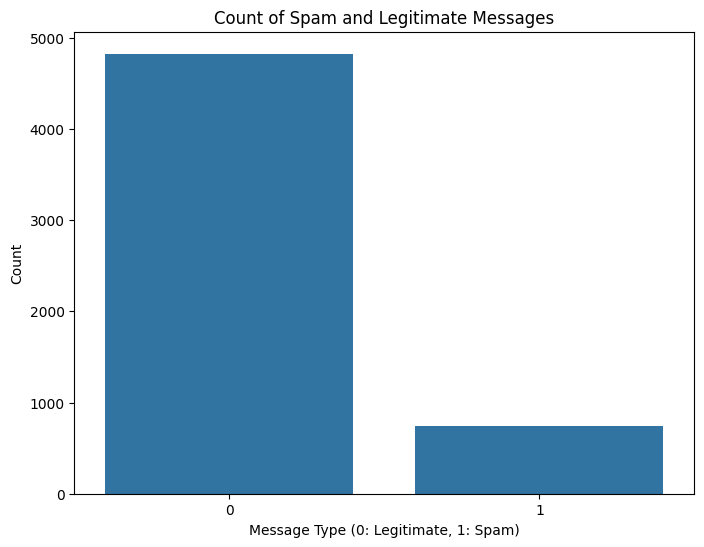

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=sms_data)
plt.title('Count of Spam and Legitimate Messages')
plt.xlabel('Message Type (0: Legitimate, 1: Spam)')
plt.ylabel('Count')
plt.show()